## Part 3.1
Instead of keeping the word embeddings fixed, now update the word embeddings (the same
way as model parameters) during the training process

In [1]:
from datasets import load_dataset
from utils.rnn_model import *
from utils.rnn_utils import *
from dotenv import load_dotenv
import os

load_dotenv()

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\qkm20\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Preparation

In [2]:
BATCH_SIZE = 32
LR = 0.0001
MODEL_TYPE = "rnn"

In [3]:
dataset = load_dataset("rotten_tomatoes")
trn_dataset = dataset["train"]
val_dataset = dataset["validation"]
tst_dataset = dataset["test"]

In [4]:
sentences = trn_dataset["text"]
words = []

for i in range(len(sentences)):
    sentences[i] = simple_preprocess(sentences[i])

for sentence in sentences:
    for word in sentence:
        if word not in words:
            words.append(word)

word2vec_model = load_word2vec(vocab=words, filepath=r"data\embedding_matrix_oov.npy")

In [5]:
word_index = {
    word: i for i, word in enumerate(
        word2vec_model.index_to_key
    )
}

In [6]:
trn_sentences, trn_labels = prepare_data(
    trn_dataset["text"],
    trn_dataset["label"],
    word_index=word_index
)
val_sentences, val_labels = prepare_data(
    val_dataset["text"],
    val_dataset["label"],
    word_index=word_index
)
tst_sentences, tst_labels = prepare_data(
    tst_dataset["text"],
    tst_dataset["label"],
    word_index=word_index
)

In [7]:
trn_dataloader = create_dataloader(
    trn_sentences,
    trn_labels,
    BATCH_SIZE,
    shuffle=True)
val_dataloader = create_dataloader(
    val_sentences,
    val_labels,
    BATCH_SIZE,
    shuffle=False)
tst_dataloader = create_dataloader(
    tst_sentences,
    tst_labels,
    BATCH_SIZE,
    shuffle=False)

## Train the Model

In [8]:
## Use the best out of the 4 models from part 4

model = RNNModel(
    embedding_dim=300,
    hidden_size=128,
    embedding_matrix=word2vec_model.vectors,
    rnn_type=MODEL_TYPE,
    freeze_embeddings=False,  # Set to False to make embeddings trainable
    bidirectional=False,
    num_layers=1,
)

In [9]:
losses, accuracies = train(
    model=model,
    trn_dataloader=trn_dataloader,
    val_dataloader=val_dataloader,
    version="2",
    model_type=MODEL_TYPE,
    model_save_path=os.getenv("MODEL_SAVE_PATH", "modelfiles/"),
    optimizer=torch.optim.Adam(model.parameters(), lr=LR),
    epochs=100,
    early_stopping_patience=10,
    train_mode="last_state"
)

Epoch   1/100, Loss: 0.6983, Accuracy: 0.4690
Model saved.
Epoch   2/100, Loss: 0.6925, Accuracy: 0.4831
Model saved.
Epoch   3/100, Loss: 0.6883, Accuracy: 0.4916
Model saved.
Epoch   4/100, Loss: 0.6770, Accuracy: 0.5450
Model saved.
Epoch   5/100, Loss: 0.6231, Accuracy: 0.6285
Model saved.
Epoch   6/100, Loss: 0.5187, Accuracy: 0.6745
Model saved.
Epoch   7/100, Loss: 0.4253, Accuracy: 0.6839
Model saved.
Epoch   8/100, Loss: 0.3500, Accuracy: 0.6839
Epoch   9/100, Loss: 0.2900, Accuracy: 0.6895
Model saved.
Epoch  10/100, Loss: 0.2354, Accuracy: 0.6923
Model saved.
Epoch  11/100, Loss: 0.1961, Accuracy: 0.7036
Model saved.
Epoch  12/100, Loss: 0.1590, Accuracy: 0.6942
Epoch  13/100, Loss: 0.1332, Accuracy: 0.6970
Epoch  14/100, Loss: 0.1055, Accuracy: 0.6914
Epoch  15/100, Loss: 0.0857, Accuracy: 0.7083
Model saved.
Epoch  16/100, Loss: 0.0665, Accuracy: 0.6970
Epoch  17/100, Loss: 0.0541, Accuracy: 0.7045
Epoch  18/100, Loss: 0.0485, Accuracy: 0.6904
Epoch  19/100, Loss: 0.0393, 

In [10]:
val_accuracy = validate(model, val_dataloader)

Accuracy: 0.7111


In [11]:
tst_accuracy = validate(model, tst_dataloader)

Accuracy: 0.7073


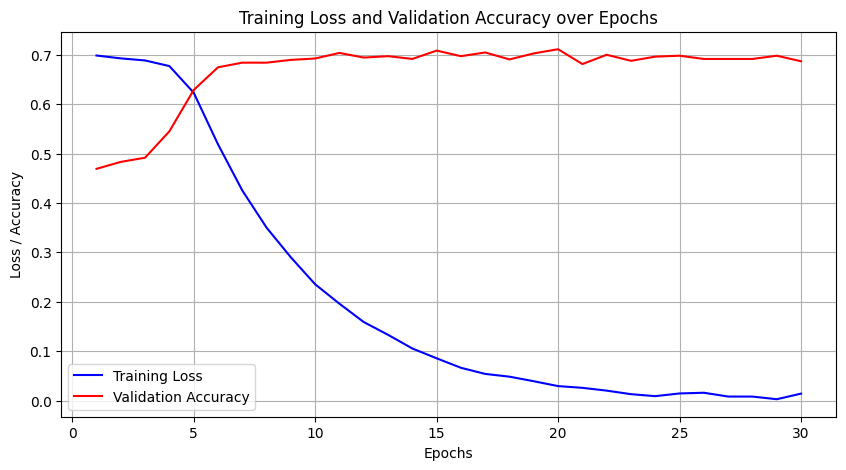

In [12]:
plot_loss_accuracy(losses, accuracies)

In [13]:
save_embeddings(word_index, word2vec_model, "data/trained_embedding_matrix_Q3P1.npy")

Embeddings saved.
